In [50]:
import json
from collections import Counter
import gensim
import jieba
from gensim.models.word2vec import Word2Vec
from gensim.models import word2vec
from tqdm import tqdm
from scipy.linalg import norm
import numpy as np
import pandas as pd
import random
from sklearn.cluster import KMeans
import jiagu
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

# 高频词  高频句

In [28]:
def high_word_sentence(data):
    with open(data, "r", encoding="utf-8-sig") as f:
        data = json.load(f)

    def counter(arr):
        return Counter(arr).most_common(10) # 返回出现频率最高的两个数

    sentences = []
    
    try:
        for i in data:
            if '哈' in i['message']:
                pass
            else:
                sentences.append(i['message'])
    except:
        for i in list(data.keys()):
            for j in range(len(data[i])):
                x = data[i][j]['message']
                if '哈' in x:
                    pass
                else:
                    sentences.append(x)        

    words = []
    for i in sentences:
        aa = jieba.lcut(i)
        for j in aa:
            if len(j) >= 2:
                words.append(j)

    print('高频句')            
    print(counter(sentences))

    print('高频词')
    print(counter(words))

## 人生一串

In [29]:
data = './数据/人生一串.json'
high_word_sentence(data)

高频句
[('梦开始的地方', 24), ('筷', 19), ('饿梦开始的地方', 7), ('叔：终于是结束了', 7), ('次次考试高分', 7), ('身体健康', 7), ('玉带献宝', 5), ('陪一根', 5), ('玉袋献宝', 5), ('正片开始', 5)]
高频词
[('开始', 77), ('这个', 76), ('地方', 52), ('不香', 42), ('年轻', 41), ('日本', 39), ('青椒', 35), ('突然', 34), ('一个', 34), ('不是', 34)]


## 孤独的美食家

In [30]:
data = './数据/孤独的美食家.json'
high_word_sentence(data)

高频句
[('富贵使我们相遇', 38), ('好惨一男的', 25), ('富贵让我们相遇', 14), ('加班有害健康', 13), ('香水有毒', 12), ('限免使我们相遇', 12), ('网络一线牵，珍惜这段缘', 11), ('红红火火恍恍惚惚', 9), ('双向奔赴', 8), ('哦豁', 7)]
高频词
[('这个', 260), ('指纹', 174), ('小哥', 158), ('我们', 147), ('会员', 143), ('喜欢', 117), ('相遇', 116), ('啊啊啊', 111), ('不是', 110), ('没有', 97)]


## 杀死伊芙

In [31]:
data = './数据/杀死伊芙.json'
high_word_sentence(data)

高频句
[('富贵使我们相遇', 38), ('好惨一男的', 25), ('富贵让我们相遇', 14), ('加班有害健康', 13), ('香水有毒', 12), ('限免使我们相遇', 12), ('网络一线牵，珍惜这段缘', 11), ('红红火火恍恍惚惚', 9), ('双向奔赴', 8), ('哦豁', 7)]
高频词
[('这个', 260), ('指纹', 174), ('小哥', 158), ('我们', 147), ('会员', 143), ('喜欢', 117), ('相遇', 116), ('啊啊啊', 111), ('不是', 110), ('没有', 97)]


## 食戟之灵

In [32]:
data = './数据/食戟之灵.json'
high_word_sentence(data)

高频句
[('完结撒花', 136), ('完结撒花，感谢陪伴', 62), ('泪目', 58), ('正片开始', 57), ('神仙打架', 57), ('招待不周', 55), ('分子料理', 43), ('眯眯眼都是怪物', 37), ('你脸红个泡泡茶壶', 32), ('感谢土豪', 30)]
高频词
[('这个', 1070), ('男主', 978), ('就是', 918), ('一个', 839), ('不是', 781), ('真的', 718), ('可爱', 610), ('完结', 595), ('没有', 578), ('料理', 534)]


## 舌尖上的中国

In [33]:
data = './数据/舌尖上的中国.json'
high_word_sentence(data)

高频句
[('多谢款待', 2033), ('感谢袁爷爷', 385), ('多谢款待！', 166), ('梦开始的地方', 162), ('完结撒花', 132), ('高端的食材往往只需要采用最朴素的烹饪方式', 128), ('1', 102), ('高端的食材往往只需要最朴素的烹饪方式', 89), ('几秒不见，甚是想念', 80), ('饿了', 78)]
高频词
[('款待', 2499), ('多谢', 2444), ('好吃', 2037), ('这个', 1487), ('2022', 1052), ('真的', 1049), ('喜欢', 888), ('感谢', 786), ('2021', 745), ('就是', 727)]


# 情感分析

In [35]:
def emotional_analysis(sentence):
    
    sentiment = jiagu.sentiment(sentence)
    
    if sentiment[0] == 'positive' and sentiment[1] > 0.8:
        return 'positive'
    elif sentiment[0] == 'negative' and sentiment[1] > 0.8:
        return 'negative'
    else:
        return 'neutral'
    

In [42]:
def json_to_sentenceList(data):
    with open(data, "r", encoding="utf-8-sig") as f:
        data = json.load(f)

    sentences_list = []
    
    try:
        for i in data:
            if '哈' in i['message']:
                pass
            else:
                sentences_list.append(i['message'])
    except:
        for i in list(data.keys()):
            for j in range(len(data[i])):
                x = data[i][j]['message']
                if '哈' in x:
                    pass
                else:
                    sentences_list.append(x) 
                    
    return sentences_list

In [52]:
def statistic_semotional_analysis(data):
    
    statistic_result = {}
    
    negative = []
    positive = []
    neutral = []

    sentences = json_to_sentenceList(data)
    
    all_num = len(sentences)
    
    for i in sentences:
        
        result = emotional_analysis(i)
        
        if result == 'positive':
            positive.append(i)
        elif result == 'negative':
            negative.append(i)
        elif result == 'neutral':
            neutral.append(i)
            
    positive_num = len(positive)
    negative_num = len(negative)
    neutral_num = len(neutral)
    
    percent_positive = round((positive_num/all_num)*100, 2)
    percent_negative = round((negative_num/all_num)*100, 2)
    percent_neutral = round((neutral_num/all_num)*100, 2)
    
    statistic_result['all_num'] = all_num
    statistic_result['positive_num'] = positive_num
    statistic_result['negative_num'] = negative_num
    statistic_result['neutral_num'] = neutral_num
    statistic_result['percent_positive'] = percent_positive
    statistic_result['percent_negative'] = percent_negative
    statistic_result['percent_neutral'] = percent_neutral
    
    statistic_result['analysis_num_list'] = [positive_num, negative_num, neutral_num]
    statistic_result['analysis_label_list'] = ['positive', 'negative', 'neutral']
    
    return statistic_result

In [65]:
def round_pie_chart(data):
    plt.figure(figsize=(10, 10.5)) # 图片尺寸
    
    y = data['analysis_num_list']
    label123 = data['analysis_label_list']

    plt.pie(y,
            labels=label123, # 设置饼图标签
            colors=["#d5695d", "#5d8ca8", "#65a479"], # 设置饼图颜色
            explode=(0, 0, 0), # 第二部分突出显示，值越大，距离中心越远
            autopct='%.2f%%', # 格式化输出百分比
           )
    
    plt.title("RUNOOB Pie Test")
    plt.show()
    

## 人生一串

In [66]:
data = './数据/人生一串.json'
statistic_semotional_analysis(data)

{'all_num': 2064,
 'positive_num': 174,
 'negative_num': 775,
 'neutral_num': 1115,
 'percent_positive': 8.43,
 'percent_negative': 37.55,
 'percent_neutral': 54.02,
 'analysis_num_list': [174, 775, 1115],
 'analysis_label_list': ['positive', 'negative', 'neutral']}

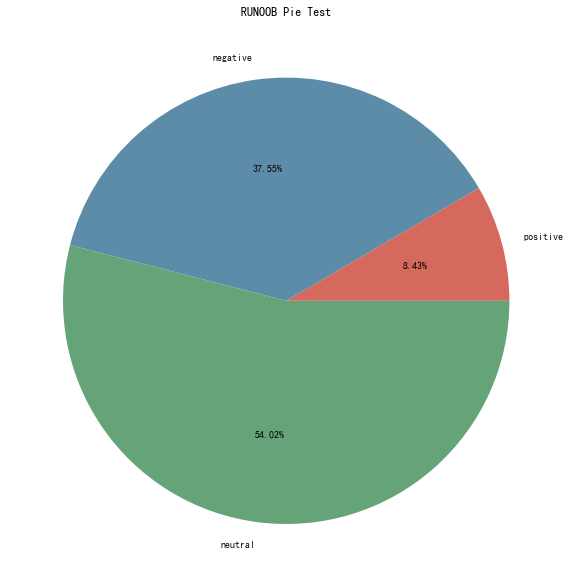

In [67]:
data = statistic_semotional_analysis(data)
round_pie_chart(data)

## 孤独的美食家

In [68]:
data = './数据/孤独的美食家.json'
statistic_semotional_analysis(data)

{'all_num': 5465,
 'positive_num': 492,
 'negative_num': 1965,
 'neutral_num': 3008,
 'percent_positive': 9.0,
 'percent_negative': 35.96,
 'percent_neutral': 55.04,
 'analysis_num_list': [492, 1965, 3008],
 'analysis_label_list': ['positive', 'negative', 'neutral']}

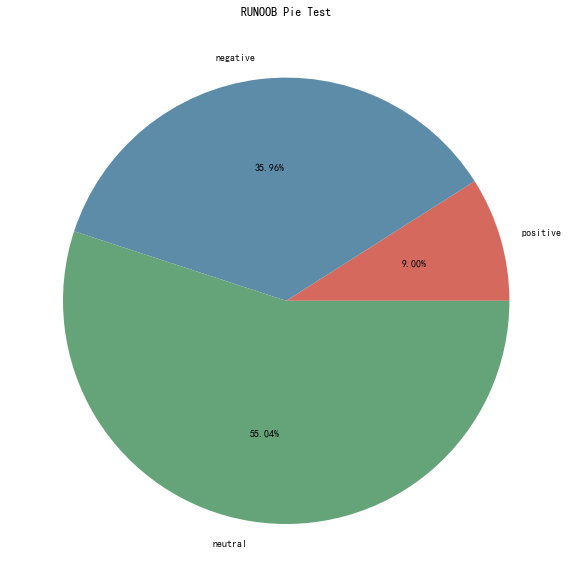

In [69]:
data = statistic_semotional_analysis(data)
round_pie_chart(data)

## 杀死伊芙

In [70]:
data = './数据/杀死伊芙.json'
statistic_semotional_analysis(data)

{'all_num': 5465,
 'positive_num': 492,
 'negative_num': 1965,
 'neutral_num': 3008,
 'percent_positive': 9.0,
 'percent_negative': 35.96,
 'percent_neutral': 55.04,
 'analysis_num_list': [492, 1965, 3008],
 'analysis_label_list': ['positive', 'negative', 'neutral']}

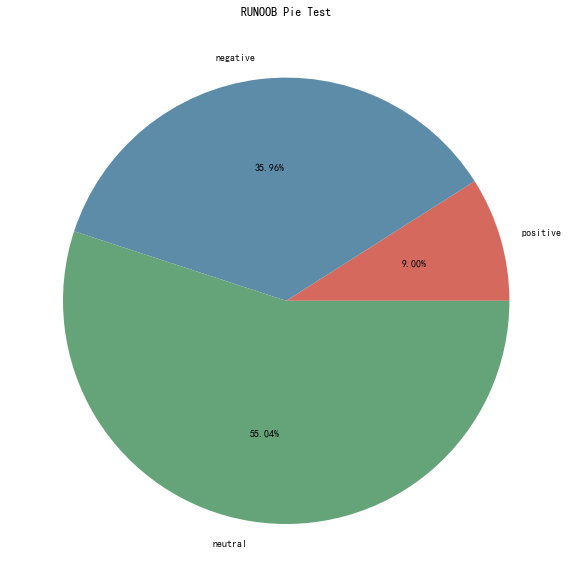

In [71]:
data = statistic_semotional_analysis(data)
round_pie_chart(data)

## 食戟之灵

In [72]:
data = './数据/食戟之灵.json'
statistic_semotional_analysis(data)

{'all_num': 46051,
 'positive_num': 4070,
 'negative_num': 15899,
 'neutral_num': 26082,
 'percent_positive': 8.84,
 'percent_negative': 34.52,
 'percent_neutral': 56.64,
 'analysis_num_list': [4070, 15899, 26082],
 'analysis_label_list': ['positive', 'negative', 'neutral']}

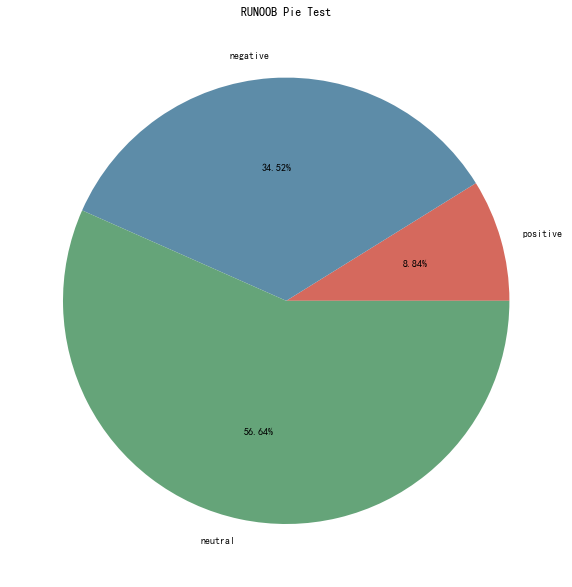

In [73]:
data = statistic_semotional_analysis(data)
round_pie_chart(data)

## 舌尖上的中国

In [74]:
data = './数据/舌尖上的中国.json'
statistic_semotional_analysis(data)

{'all_num': 48441,
 'positive_num': 8268,
 'negative_num': 12792,
 'neutral_num': 27381,
 'percent_positive': 17.07,
 'percent_negative': 26.41,
 'percent_neutral': 56.52,
 'analysis_num_list': [8268, 12792, 27381],
 'analysis_label_list': ['positive', 'negative', 'neutral']}

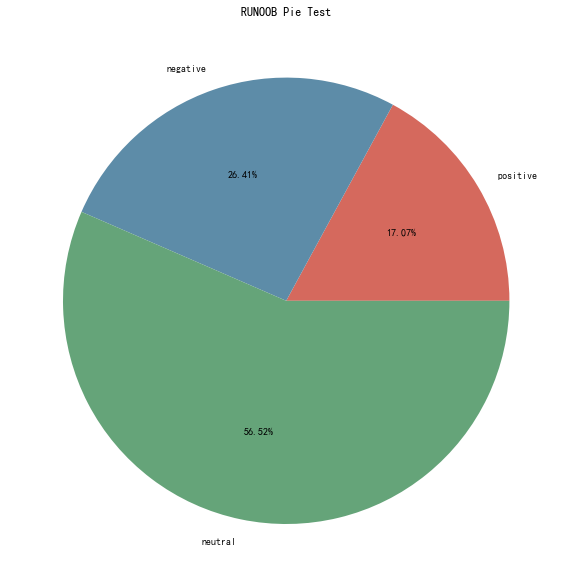

In [75]:
data = statistic_semotional_analysis(data)
round_pie_chart(data)

# 动机分析

In [190]:
def Motivation_Analysis(data):
    
    global model, s
    
    print('数据预处理中.........................')
    
    with open(data, "r", encoding="utf-8-sig") as f:
        data = json.load(f)

    sentences_list = []
    
    # 预处理 去停用词
    try:
        for i in data:
            if '哈' in i['message']:
                pass
            else:
                sentences_list.append(i['message'])
    except:
        for i in list(data.keys()):
            for j in range(len(data[i])):
                x = data[i][j]['message']
                if '哈' in x:
                    pass
                else:
                    sentences_list.append(x) 
                    
    train_data_preprocess_result = []
    
    for i in tqdm(sentences_list):
        i = jieba.lcut(i)  # jieba分词
        train_data_preprocess_result.append(i)
        
    print('词向量训练中.........................')
    # 训练词向量
    model = Word2Vec()
    model.build_vocab(train_data_preprocess_result)
    # 输入模型的数据形式train_data_preprocess_result
    # size词向量的维度
    model = word2vec.Word2Vec(train_data_preprocess_result, vector_size=100, hs=1, min_count=0, window=3)
    model.save('word2vec.model')
    
#     model = word2vec.Word2Vec.load('word2vec.model')  # 加载word2vec模型

    database_sentence_vector = {}

    for i in tqdm(sentences_list):
        j = sentence_to_vector(i)
        database_sentence_vector[i] = j
        
        
    print('聚类中.........................')
    keys_sentence = database_sentence_vector.keys()

    # 获取句子对于的句子向量
    sentencevector = []
    for key in keys_sentence:
        sentencevector.append(database_sentence_vector[key])

     #分类
    classCount = 3 #分类数
    clf = KMeans(n_clusters=classCount)
    s = clf.fit(sentencevector)

    labels = clf.labels_

    #把是一类的放入到一个字典里
    classCollects_sentence = {}
    for i in tqdm(range(len(keys_sentence))):
        if labels[i] in list(classCollects_sentence.keys()):
            classCollects_sentence[labels[i]].append(list(keys_sentence)[i])
        else:
            classCollects_sentence = {0:[],1:[],2:[]}
            
            
    tmp_dict = {}
            
    tmp_dict['num_label_0'] = len(classCollects_sentence[0])
    tmp_dict['num_label_1'] = len(classCollects_sentence[1])
    tmp_dict['num_label_2'] = len(classCollects_sentence[2])
    
    tmp_dict['num_label_all'] = len(classCollects_sentence[0]) + len(classCollects_sentence[1]) + len(classCollects_sentence[2])
            
    return classCollects_sentence, tmp_dict
    

In [191]:
def ALL_Motivation_Analysis():
    
    global model, s
    
    print('数据预处理中.........................')
    
#     with open(data, "r", encoding="utf-8-sig") as f:
#         data = json.load(f)
        
    with open('./数据/人生一串.json', "r", encoding="utf-8-sig") as f:
        data11 = json.load(f)
        
    with open('./数据/孤独的美食家.json', "r", encoding="utf-8-sig") as f:
        data22 = json.load(f)
        
    with open('./数据/杀死伊芙.json', "r", encoding="utf-8-sig") as f:
        data33 = json.load(f)
        
    with open('./数据/食戟之灵.json', "r", encoding="utf-8-sig") as f:
        data44 = json.load(f)
        
    with open('./数据/舌尖上的中国.json', "r", encoding="utf-8-sig") as f:
        data55 = json.load(f)
        
        
    
    
    def process_data(data):
        
        global sentences_list
        
        sentences_list = []

        # 预处理 去停用词
        try:
            for i in data:
                if '哈' in i['message']:
                    pass
                else:
                    sentences_list.append(i['message'])
        except:
            for i in list(data.keys()):
                for j in range(len(data[i])):
                    x = data[i][j]['message']
                    if '哈' in x:
                        pass
                    else:
                        sentences_list.append(x)
                        
        return sentences_list
    
    data11 = process_data(data11)
    data22 = process_data(data22)
    data33 = process_data(data33)
    data44 = process_data(data44)
    data55 = process_data(data55)
    
    data = data11 + data22 + data33 + data44 + data55
    
                    
    train_data_preprocess_result = []
    
    for i in tqdm(sentences_list):
        i = jieba.lcut(i)  # jieba分词
        train_data_preprocess_result.append(i)
        
    print('词向量训练中.........................')
    # 训练词向量
    model = Word2Vec()
    model.build_vocab(train_data_preprocess_result)
    # 输入模型的数据形式train_data_preprocess_result
    # size词向量的维度
    model = word2vec.Word2Vec(train_data_preprocess_result, vector_size=100, hs=1, min_count=0, window=3)
    model.save('word2vec.model')
    
#     model = word2vec.Word2Vec.load('word2vec.model')  # 加载word2vec模型

    database_sentence_vector = {}

    for i in tqdm(sentences_list):
        j = sentence_to_vector(i)
        database_sentence_vector[i] = j
        
        
    print('聚类中.........................')
    keys_sentence = database_sentence_vector.keys()

    # 获取句子对于的句子向量
    sentencevector = []
    for key in keys_sentence:
        sentencevector.append(database_sentence_vector[key])

     #分类
    classCount = 3 #分类数
    clf = KMeans(n_clusters=classCount)
    s = clf.fit(sentencevector)

    labels = clf.labels_

    #把是一类的放入到一个字典里
    classCollects_sentence = {}
    for i in tqdm(range(len(keys_sentence))):
        if labels[i] in list(classCollects_sentence.keys()):
            classCollects_sentence[labels[i]].append(list(keys_sentence)[i])
        else:
            classCollects_sentence = {0:[],1:[],2:[]}
            
    tmp_dict = {}
            
    tmp_dict['num_label_0'] = len(classCollects_sentence[0])
    tmp_dict['num_label_1'] = len(classCollects_sentence[1])
    tmp_dict['num_label_2'] = len(classCollects_sentence[2])
    
    tmp_dict['num_label_all'] = len(classCollects_sentence[0]) + len(classCollects_sentence[1]) + len(classCollects_sentence[2])
            
    return classCollects_sentence, tmp_dict
    

In [192]:
def sentence_to_vector(sentence):
    """句子 向量化"""
    sentence = jieba.lcut(sentence)
    sentence_vector = np.zeros(100)  # 创建100维度的0向量
    for word in sentence:
        try:
            sentence_vector += model.wv[word]  # 执行 word embedding 操作
        except:
            pass
    sentence_vector /= len(sentence)
    return sentence_vector  # 数据类型：列表(向量)

In [193]:
def sentence_similarity(sentence1,sentence2):
    """句子 相似度 计算"""
    sentence1 = sentence_to_vector(sentence1)
    sentence2 = sentence_to_vector(sentence2)
    result = np.dot(sentence1, sentence2) / (norm(sentence1) * norm(sentence2))
    return result

In [194]:
def Cluster_Predict(data):
    p_data = sentence_to_vector(data)
    f = np.array([p_data])
    return s.predict(f)[0]

## 数据准备

In [195]:
data123 = pd.read_excel('./123.xlsx')

rsyc = {}  # 人生一串
gddmsj = {}  # 孤独的美食家
ssyf = {}  # 杀死伊芙
sjzl = {}  # 食戟之灵
sjsdzg = {}  #  舌尖上的中国

labels = list(data123['需求'])
data1 = list(data123['舌尖上的中国'])
data2 = list(data123['人生一串'])
data3 = list(data123['孤独的美食家'])
data4 = list(data123['杀死伊芙'])

for i in range(len(labels)):
    
    sjsdzg[data1[i]] = labels[i]
    rsyc[data2[i]] = labels[i]
    gddmsj[data3[i]] = labels[i]
    ssyf[data4[i]] = labels[i]

## 人生一串

### 单独数据-预测结果

In [202]:
data = './数据/人生一串.json'
result = Motivation_Analysis(data)

print(result[1])

for i in list(rsyc.keys()):
    print(Cluster_Predict(i), rsyc[i], i)

数据预处理中.........................


100%|███████████████████████████████████████████████████████████████████████████| 2064/2064 [00:00<00:00, 22495.00it/s]

词向量训练中.........................



100%|███████████████████████████████████████████████████████████████████████████| 2064/2064 [00:00<00:00, 14888.61it/s]


聚类中.........................


100%|███████████████████████████████████████████████████████████████████████████| 1927/1927 [00:00<00:00, 37885.53it/s]

{'num_label_0': 696, 'num_label_1': 167, 'num_label_2': 1063, 'num_label_all': 1926}
2 社交 我上辈子一定是重庆人
2 社交 还好我是人类
2 社交 弹幕都惊讶啥呢鸭头鱼头兔头不都吃，整只鸽子不也挺吓人，换个动物怎么突然就都受不了了
2 信息 我总算知道标题为什么这么取了
0 信息 跟吃豆腐一样爽
0 信息 田螺姑娘这种童话永远都不可能出现在广东
2 娱乐 蛋蛋的忧桑
2 娱乐 羊：快放开我 撒手
2 娱乐 为什么我的嘴角时长闪现出泪花


### 全部数据-预测结果

In [203]:
result = ALL_Motivation_Analysis()

print(result[1])

for i in list(rsyc.keys()):
    print(Cluster_Predict(i), rsyc[i], i)

数据预处理中.........................


100%|█████████████████████████████████████████████████████████████████████████| 48441/48441 [00:01<00:00, 25877.05it/s]


词向量训练中.........................


100%|█████████████████████████████████████████████████████████████████████████| 48441/48441 [00:02<00:00, 16222.61it/s]


聚类中.........................


100%|██████████████████████████████████████████████████████████████████████████| 39620/39620 [00:12<00:00, 3109.31it/s]

{'num_label_0': 22506, 'num_label_1': 15424, 'num_label_2': 1689, 'num_label_all': 39619}
0 社交 我上辈子一定是重庆人
0 社交 还好我是人类
0 社交 弹幕都惊讶啥呢鸭头鱼头兔头不都吃，整只鸽子不也挺吓人，换个动物怎么突然就都受不了了
0 信息 我总算知道标题为什么这么取了
1 信息 跟吃豆腐一样爽
0 信息 田螺姑娘这种童话永远都不可能出现在广东
1 娱乐 蛋蛋的忧桑
1 娱乐 羊：快放开我 撒手
1 娱乐 为什么我的嘴角时长闪现出泪花


## 孤独的美食家

### 单独数据-预测结果

In [205]:
data = './数据/孤独的美食家.json'
result = Motivation_Analysis(data)

print(result[1])

for i in list(gddmsj.keys()):
    try:
        print(Cluster_Predict(i), gddmsj[i], i)
    except:
        print("数据有问题",i)

数据预处理中.........................


100%|███████████████████████████████████████████████████████████████████████████| 5465/5465 [00:00<00:00, 24906.06it/s]


词向量训练中.........................


100%|███████████████████████████████████████████████████████████████████████████| 5465/5465 [00:00<00:00, 16095.77it/s]


聚类中.........................


100%|███████████████████████████████████████████████████████████████████████████| 5032/5032 [00:00<00:00, 17045.42it/s]

{'num_label_0': 1642, 'num_label_1': 3326, 'num_label_2': 63, 'num_label_all': 5031}
1 社交 梦开始的地方，各位
1 社交 来四川得吃鱼香肉丝啊
0 社交 来云南吃野生菌啊
数据有问题 nan
0 信息 龙口粉丝
0 信息 放醋啊！吃面怎么能不放醋
1 娱乐 翻译了个寂寞
1 娱乐 哈哈哈哈哈哈哈这个化妆技术也是没谁了
0 娱乐 叔の害怕


### 全部数据-预测结果

In [206]:
result = ALL_Motivation_Analysis()

print(result[1])

for i in list(gddmsj.keys()):
    try:
        print(Cluster_Predict(i), gddmsj[i], i)
    except:
        print("数据有问题",i)

数据预处理中.........................


100%|█████████████████████████████████████████████████████████████████████████| 48441/48441 [00:01<00:00, 27271.47it/s]


词向量训练中.........................


100%|█████████████████████████████████████████████████████████████████████████| 48441/48441 [00:03<00:00, 15934.24it/s]


聚类中.........................


100%|██████████████████████████████████████████████████████████████████████████| 39620/39620 [00:13<00:00, 3004.84it/s]


{'num_label_0': 15205, 'num_label_1': 22745, 'num_label_2': 1669, 'num_label_all': 39619}
1 社交 梦开始的地方，各位
1 社交 来四川得吃鱼香肉丝啊
1 社交 来云南吃野生菌啊
数据有问题 nan
0 信息 龙口粉丝
1 信息 放醋啊！吃面怎么能不放醋
0 娱乐 翻译了个寂寞
1 娱乐 哈哈哈哈哈哈哈这个化妆技术也是没谁了
0 娱乐 叔の害怕


## 杀死伊芙

### 单独数据-预测结果

In [208]:
data = './数据/杀死伊芙.json'
result = Motivation_Analysis(data)

print(result[1])

for i in list(ssyf.keys()):
    try:
        print(Cluster_Predict(i), ssyf[i], i)
    except:
        print("数据有问题",i)

数据预处理中.........................


100%|███████████████████████████████████████████████████████████████████████████| 5465/5465 [00:00<00:00, 23120.76it/s]


词向量训练中.........................


100%|███████████████████████████████████████████████████████████████████████████| 5465/5465 [00:00<00:00, 16115.48it/s]


聚类中.........................


100%|███████████████████████████████████████████████████████████████████████████| 5032/5032 [00:00<00:00, 17275.83it/s]

{'num_label_0': 3355, 'num_label_1': 1629, 'num_label_2': 47, 'num_label_all': 5031}
0 社交 变装，不懂？
1 社交 骨头怎么办
0 社交 我是年费老爷
0 信息 之前那个丈夫杀妻，最后还是被发现了
0 信息 这剧的BGM超诡异的
0 信息 不同时间的异口同声，这简直是编剧的第1次暗示肯尼和女大佬的关系非同一般
0 娱乐 把我Siri喊出来了哈哈哈
数据有问题 nan
2 娱乐 富贵使我们相遇


### 全部数据-预测结果

In [209]:
result = ALL_Motivation_Analysis()

print(result[1])

for i in list(ssyf.keys()):
    try:
        print(Cluster_Predict(i), ssyf[i], i)
    except:
        print("数据有问题",i)

数据预处理中.........................


100%|█████████████████████████████████████████████████████████████████████████| 48441/48441 [00:01<00:00, 27149.50it/s]


词向量训练中.........................


100%|█████████████████████████████████████████████████████████████████████████| 48441/48441 [00:03<00:00, 15973.15it/s]


聚类中.........................


100%|██████████████████████████████████████████████████████████████████████████| 39620/39620 [00:13<00:00, 3044.59it/s]

{'num_label_0': 22599, 'num_label_1': 15340, 'num_label_2': 1680, 'num_label_all': 39619}
0 社交 变装，不懂？
1 社交 骨头怎么办
0 社交 我是年费老爷
0 信息 之前那个丈夫杀妻，最后还是被发现了
1 信息 这剧的BGM超诡异的
1 信息 不同时间的异口同声，这简直是编剧的第1次暗示肯尼和女大佬的关系非同一般
1 娱乐 把我Siri喊出来了哈哈哈
数据有问题 nan
1 娱乐 富贵使我们相遇


## 食戟之灵

### 单独数据-预测结果

In [210]:
data = './数据/食戟之灵.json'
result = Motivation_Analysis(data)

print(result[1])

for i in list(sjzl.keys()):
    try:
        print(Cluster_Predict(i), sjzl[i], i)
    except:
        print("数据有问题",i)

数据预处理中.........................


100%|█████████████████████████████████████████████████████████████████████████| 46051/46051 [00:01<00:00, 23188.32it/s]


词向量训练中.........................


100%|█████████████████████████████████████████████████████████████████████████| 46051/46051 [00:02<00:00, 15453.03it/s]


聚类中.........................


100%|██████████████████████████████████████████████████████████████████████████| 40313/40313 [00:14<00:00, 2818.60it/s]

{'num_label_0': 14072, 'num_label_1': 22253, 'num_label_2': 3987, 'num_label_all': 40312}


### 全部数据-预测结果

In [211]:
result = ALL_Motivation_Analysis()

print(result[1])

for i in list(sjzl.keys()):
    try:
        print(Cluster_Predict(i), sjzl[i], i)
    except:
        print("数据有问题",i)

数据预处理中.........................


100%|█████████████████████████████████████████████████████████████████████████| 48441/48441 [00:01<00:00, 26198.06it/s]


词向量训练中.........................


100%|█████████████████████████████████████████████████████████████████████████| 48441/48441 [00:03<00:00, 15700.83it/s]


聚类中.........................


100%|██████████████████████████████████████████████████████████████████████████| 39620/39620 [00:13<00:00, 2967.02it/s]


{'num_label_0': 22883, 'num_label_1': 15058, 'num_label_2': 1678, 'num_label_all': 39619}


## 舌尖上的中国

### 单独数据-预测结果

In [212]:
data = './数据/舌尖上的中国.json'
result = Motivation_Analysis(data)

print(result[1])

for i in list(sjsdzg.keys()):
    try:
        print(Cluster_Predict(i), sjsdzg[i], i)
    except:
        print("数据有问题",i)

数据预处理中.........................


100%|█████████████████████████████████████████████████████████████████████████| 48441/48441 [00:01<00:00, 26704.69it/s]


词向量训练中.........................


100%|█████████████████████████████████████████████████████████████████████████| 48441/48441 [00:02<00:00, 16765.59it/s]


聚类中.........................


100%|██████████████████████████████████████████████████████████████████████████| 39620/39620 [00:13<00:00, 2853.17it/s]


{'num_label_0': 22439, 'num_label_1': 1710, 'num_label_2': 15470, 'num_label_all': 39619}
2 社交 今天刚好是立冬
2 社交 廣州人來報道
0 社交 "这一集有我的家乡，贵州省从江县，欢迎远方的朋友来我们从江做客
2 信息 数学来源于生活，也服务于生活
0 信息 豆腐在汉代发明的 是一个王爷发明的。
0 信息 太辛苦了
2 娱乐 哈哈哈哈哈糯米僵尸
2 娱乐 多谢款待
0 娱乐 高端的食材


### 全部数据-预测结果

In [213]:
result = ALL_Motivation_Analysis()

print(result[1])

for i in list(sjsdzg.keys()):
    try:
        print(Cluster_Predict(i), sjsdzg[i], i)
    except:
        print("数据有问题",i)

数据预处理中.........................


100%|█████████████████████████████████████████████████████████████████████████| 48441/48441 [00:01<00:00, 26571.96it/s]


词向量训练中.........................


100%|█████████████████████████████████████████████████████████████████████████| 48441/48441 [00:02<00:00, 16696.87it/s]


聚类中.........................


100%|██████████████████████████████████████████████████████████████████████████| 39620/39620 [00:12<00:00, 3224.31it/s]

{'num_label_0': 14960, 'num_label_1': 22999, 'num_label_2': 1660, 'num_label_all': 39619}
0 社交 今天刚好是立冬
0 社交 廣州人來報道
1 社交 "这一集有我的家乡，贵州省从江县，欢迎远方的朋友来我们从江做客
0 信息 数学来源于生活，也服务于生活
1 信息 豆腐在汉代发明的 是一个王爷发明的。
1 信息 太辛苦了
0 娱乐 哈哈哈哈哈糯米僵尸
0 娱乐 多谢款待
1 娱乐 高端的食材
